## [당뇨병 데이터로 5가지의 머신러닝 알고리즘(SVM, LR, RF, DT, KNN)을 이용하여 BMI 예측]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import tensorflow as tf
from tensorflow import keras

### 1. csv 파일 불러오기

In [2]:
df = pd.read_csv("diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


### 2. 데이터 확인

In [3]:
# 컬럼명 확인
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
# Outcome column 삭제
df.drop(columns=['Outcome'], inplace=True)
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [5]:
# 결측치 확인
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

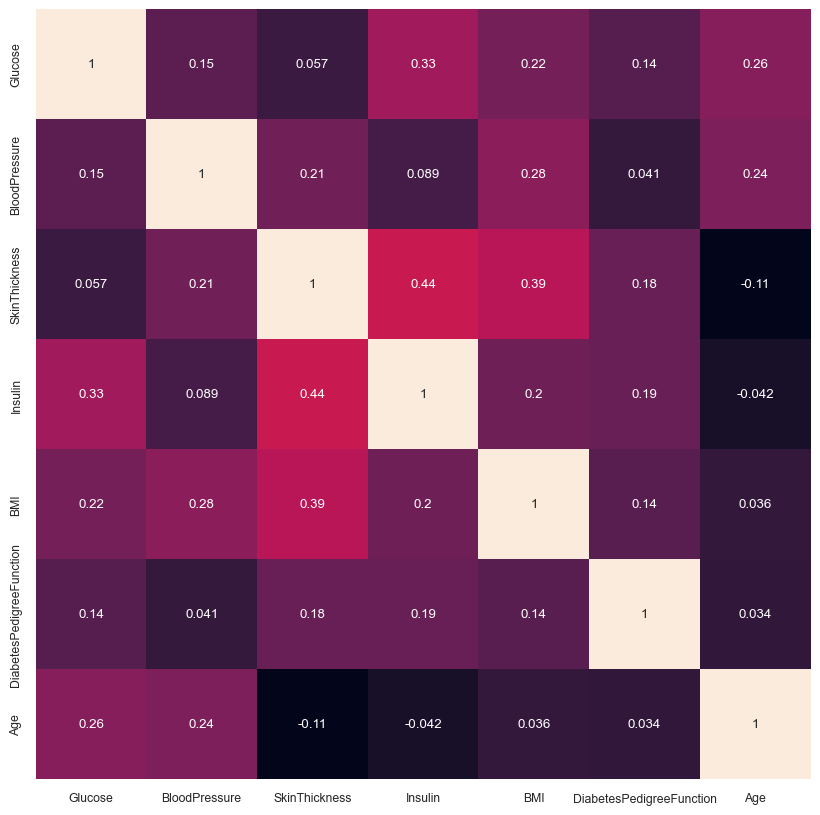

In [6]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

### 3. data/label 나누기 & train/test dataset 나누기

In [7]:
X = df.drop('BMI', axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,
6,148,72,35,0,0.627,50
1,85,66,29,0,0.351,31
8,183,64,0,0,0.672,32
1,89,66,23,94,0.167,21
0,137,40,35,168,2.288,33


In [8]:
y = df['BMI']
y.head()

Pregnancies
6    33.6
1    26.6
8    23.3
1    28.1
0    43.1
Name: BMI, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. 모델 생성/학습/예측 및 평가

In [10]:
from sklearn.metrics import mean_squared_error

#### - 4.1 SVM

In [11]:
from sklearn.svm import SVR

rg_svm = SVR(kernel='linear')
rg_svm.fit(X_train, y_train)

pred_svm = rg_svm.predict(X_test)
print('평균제곱오차', mean_squared_error(pred_svm, y_test))

평균제곱오차 52.83725074936974


#### - 4.2 LinearRegression

In [12]:
from sklearn.linear_model import LinearRegression

rg_lr = LinearRegression()
rg_lr.fit(X_train, y_train)

pred_lr = rg_lr.predict(X_test)
print('평균제곱오차', mean_squared_error(pred_lr, y_test))

평균제곱오차 52.10225730069577


#### - 4.3 RandomForest

In [13]:
from sklearn.ensemble import RandomForestRegressor

rg_rf = RandomForestRegressor(random_state=42)
rg_rf.fit(X_train, y_train)

pred_rf = rg_rf.predict(X_test)
print('평균제곱오차', mean_squared_error(pred_rf, y_test))

평균제곱오차 48.97499178571431


#### - 4.4 DecisionTree

In [14]:
from sklearn.tree import DecisionTreeRegressor

rg_dt = DecisionTreeRegressor(random_state=42)
rg_dt.fit(X_train, y_train)

pred_dt = rg_dt.predict(X_test)
print('평균제곱오차', mean_squared_error(pred_dt, y_test))

평균제곱오차 106.50902597402597


#### - 4.5 KNeighbors

In [15]:
from sklearn.neighbors import KNeighborsRegressor

rg_knn = KNeighborsRegressor()
rg_knn.fit(X_train, y_train)

pred_knn = rg_knn.predict(X_test)
print('평균제곱오차', mean_squared_error(pred_knn, y_test))

평균제곱오차 51.862854545454546
